<a href="https://colab.research.google.com/github/viczzzz/Capstone-Fashion-Trend-Forecasting/blob/main/Capstone_Milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing  required libraries
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.getcwd()
os.chdir('/content/drive/MyDrive/zalando')

In [4]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
#Shape of training data
fashion_train_df.shape
#Shape of test data
fashion_test_df.shape

(10000, 785)

In [6]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

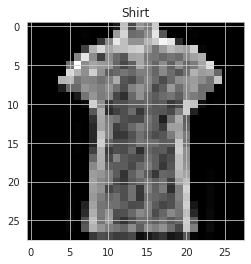

In [8]:
i = random.randint(1,60000)
# The values are mapped to colors using normalization and a colormap
plt.imshow(train[i,1:].reshape((28,28))) 

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') 
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis()

In [9]:
#Label of the random image
label = train[i,0]
label

6.0

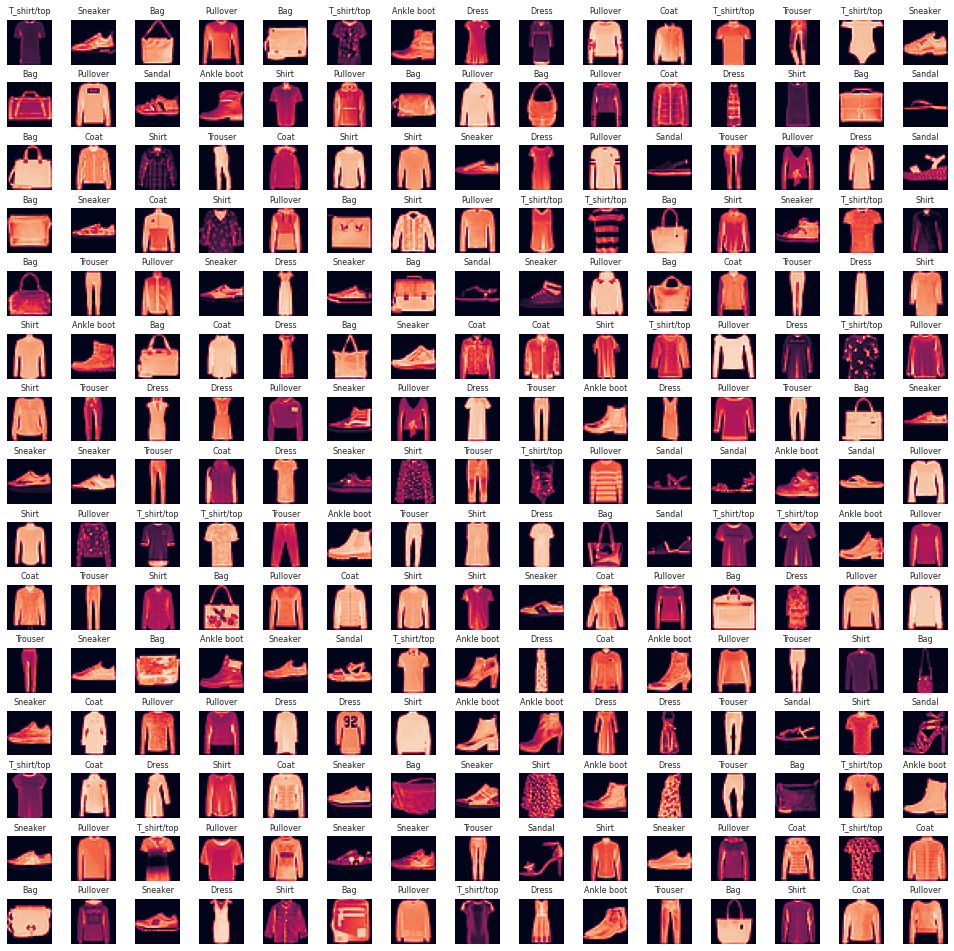

In [10]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [11]:
# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

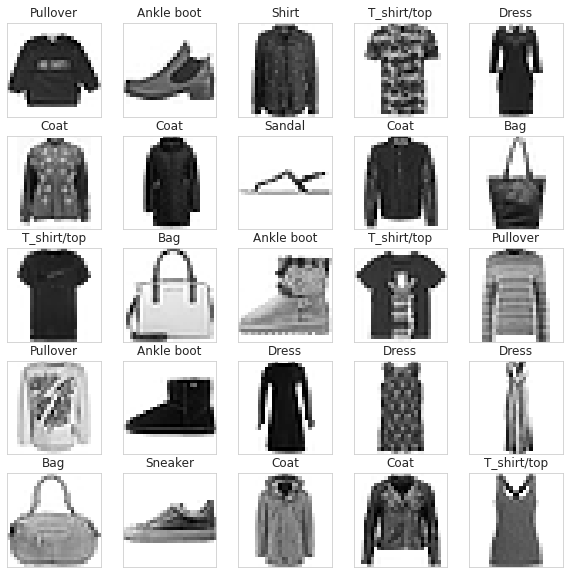

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [13]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [14]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [15]:
X_train.shape
Input_shape = X_train.shape[1:]
Input_shape

(28, 28, 1)

In [16]:
##To define and train the convolutional neural network, we will import the required libraries here.
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [18]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [ ]:
#Training the CNN model
#history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))


Epoch 1/5
94/94 [==============================] - 45s 473ms/step - loss: 1.1575 - accuracy: 0.5609 - val_loss: 0.6741 - val_accuracy: 0.7467
Epoch 2/5
46/94 [=============>................] - ETA: 22s - loss: 0.7147 - accuracy: 0.7334

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.round(predicted_classes).astype(int)
test_img = X_test
prediction = cnn_model.predict(test_img)
prediction[0]
np.argmax(prediction[0])

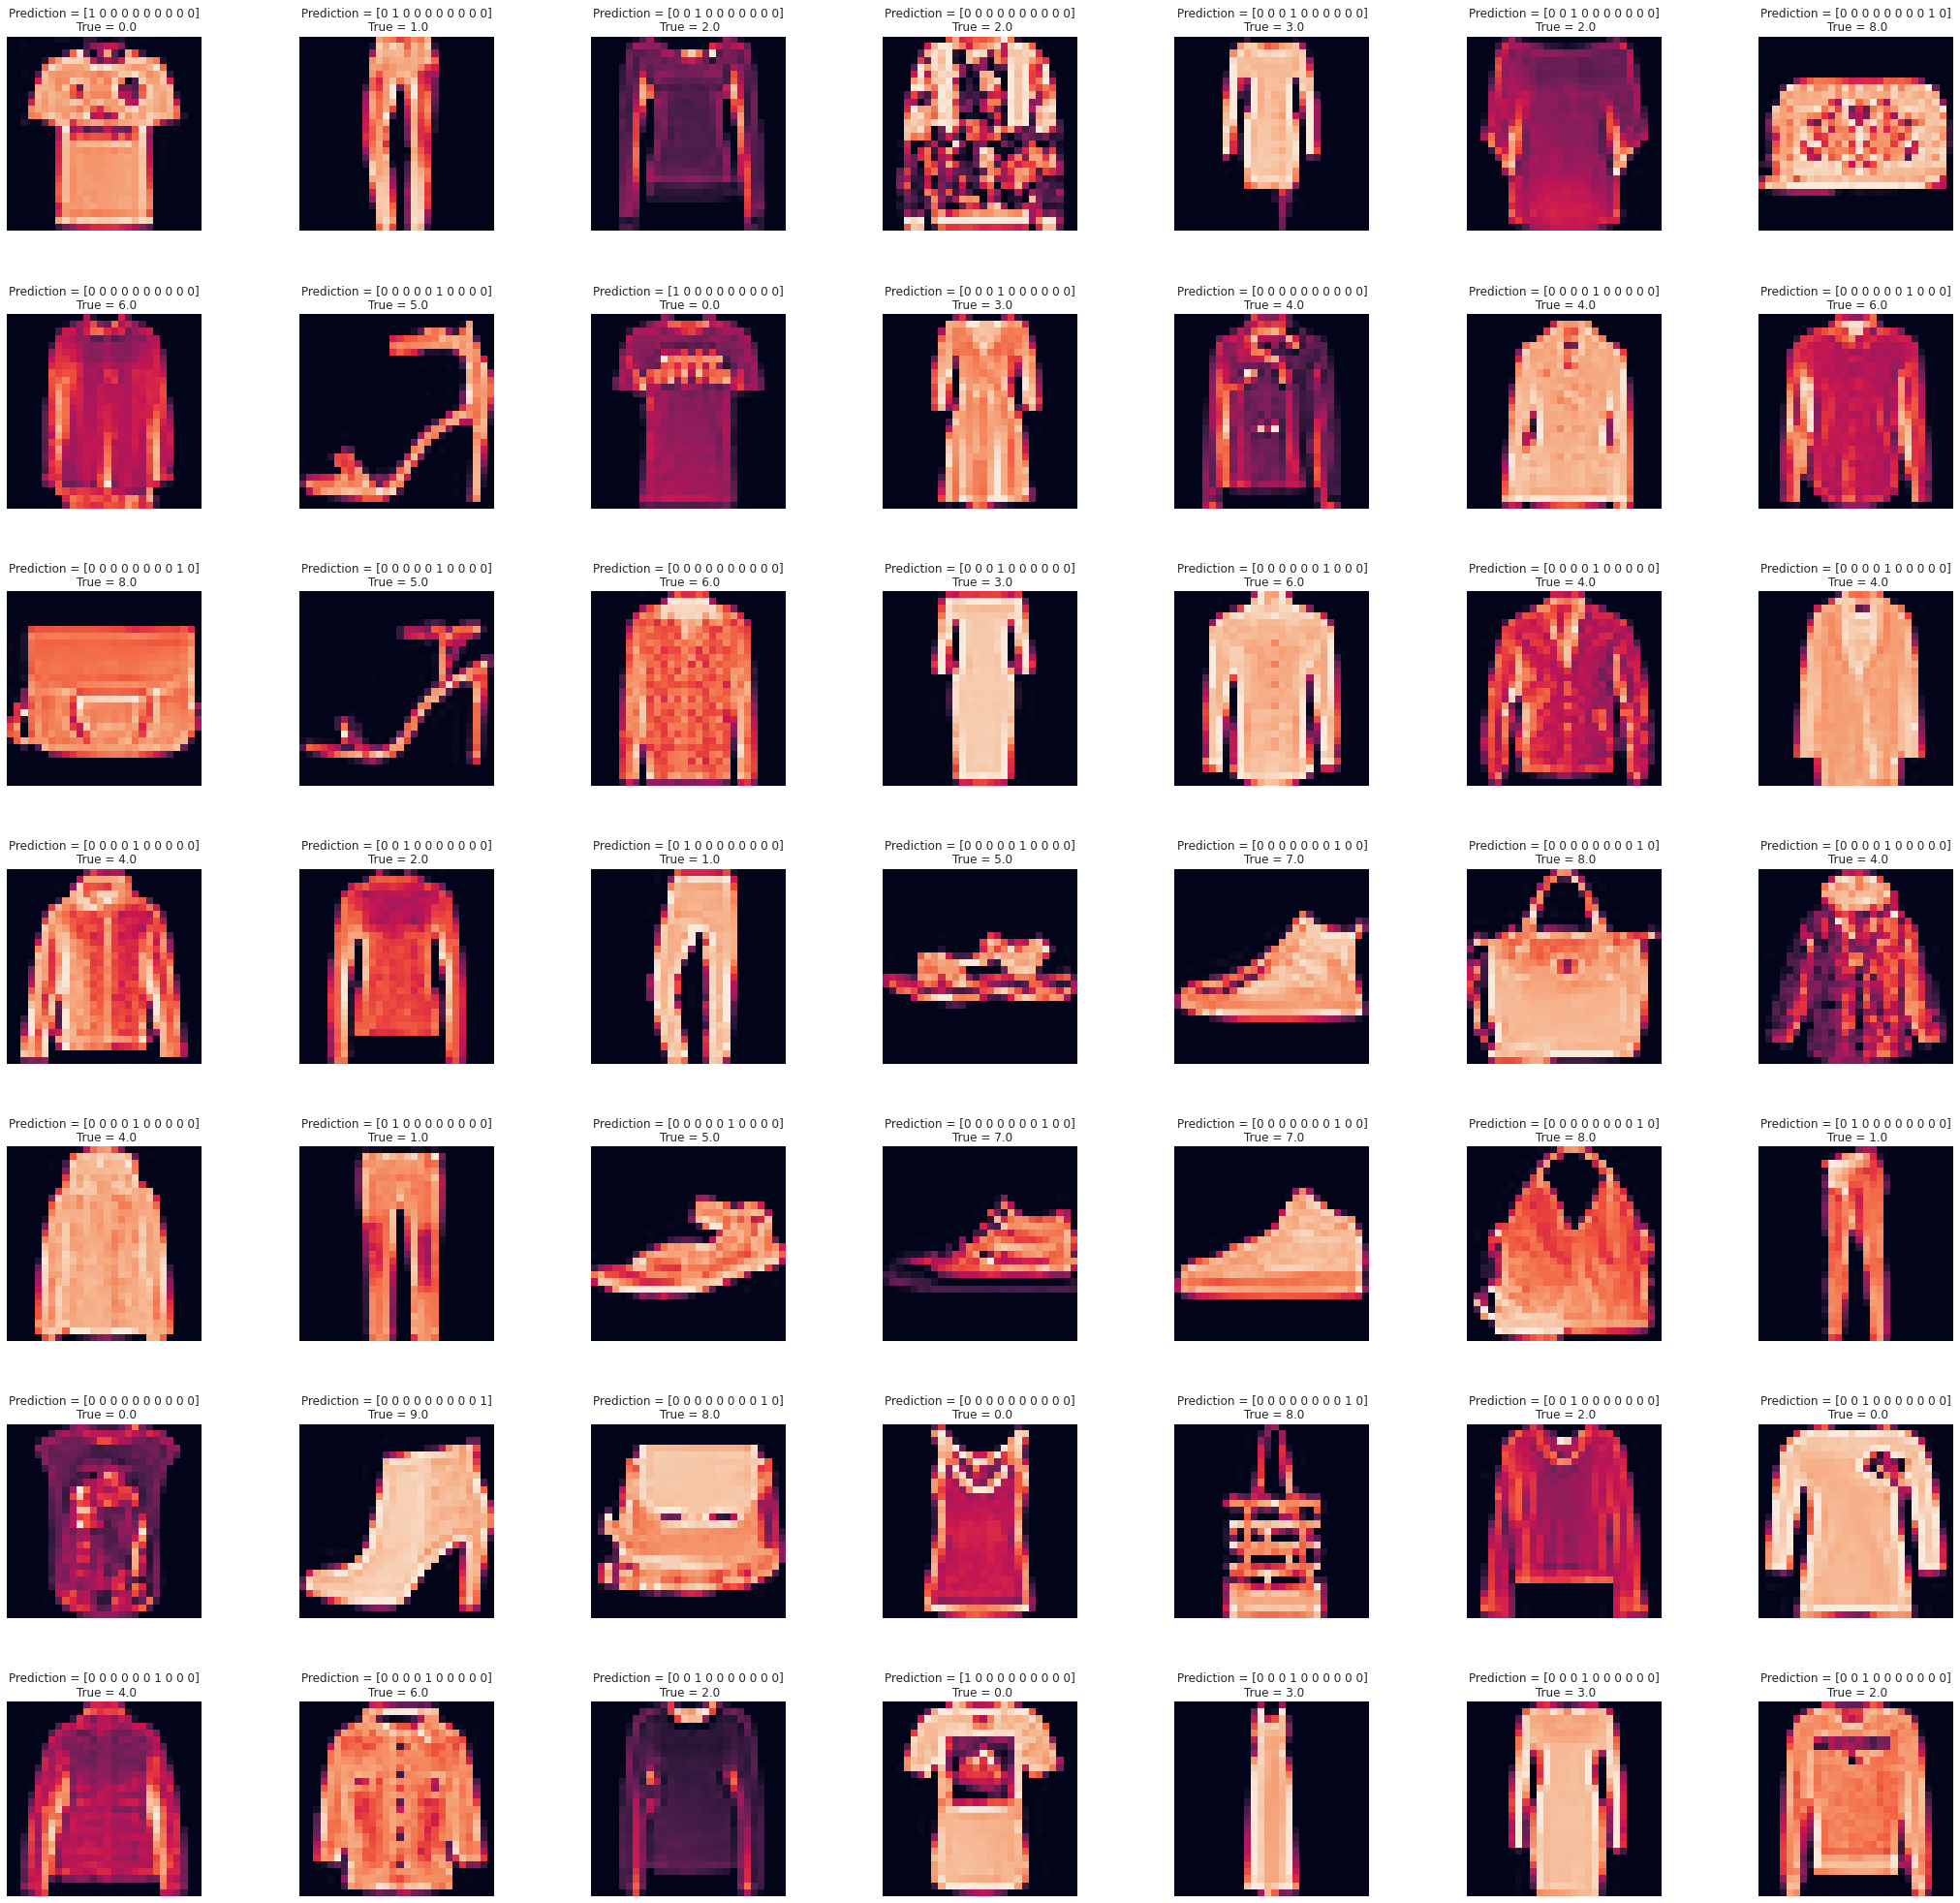

In [26]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (36,36))
axes = axes.ravel()
#X_test[i].tolist()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    #axes[i].set_title("Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics



y_test = np.argmax(y_test,axis=None)
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(y_test_arg, predicted_classes))

cm = metrics.confusion_matrix(y_test, predicted_classes)

TypeError: ignored

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, normalize=True, title='Normalized Confusion matrix')

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import keras
import tensorflow as tf
#from keras.applications import VGG19
#from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
tf.keras.applications.vgg19.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

574726144/574710816 [==============================] - 3s 0us/step


In [ ]:
tf.keras.applications.VGG19
tf.keras.applications.vgg19.VGG19

<function keras.applications.vgg19.VGG19>

In [ ]:
# Create the base model of VGG19
vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape = None, classes = 10)

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")

In [ ]:
# Preprocessing the input 
from keras.applications.mobilenet_v2 import preprocess_input

X_train = preprocess_input(X_train)
X_validate = preprocess_input(X_validate)
X_test = preprocess_input(X_test)

In [ ]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size = 256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size = 256, verbose=1)
val_features = vgg19.predict(np.array(X_validate), batch_size = 256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

ValueError: ignored